In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# import the dataset
team_Data = pd.read_csv("Resources/teamData.csv")
player_Data = pd.read_csv("Resources/playerData.csv")
cross_ref = pd.read_csv("Resources/crossReference.csv")

In [3]:
cross_ref.head()

,Team,TM
0,76ers,PHI
1,Blackhawks,TRI
2,Bobcats,CHA
3,Bommers,STB
4,Braves,BLB


In [4]:
combined_team_data = pd.merge(team_Data, cross_ref, on="Team")
combined_team_data

,Year,Team,Record,Winning Percentage,TM
0,1964,76ers,34-46,0.425,PHI
1,1965,76ers,40-40,0.500,PHI
2,1966,76ers,55-25,0.688,PHI
3,1967,76ers,68-13,0.840,PHI
4,1968,76ers,62-20,0.756,PHI
...,...,...,...,...,...
2278,2013,Wizards,29-53,0.354,WAS
2279,2014,Wizards,44-38,0.537,WAS
2280,2015,Wizards,46-36,0.561,WAS
2281,2016,Wizards,41-41,0.500,WAS


In [5]:
combined_team_data = combined_team_data.loc[(combined_team_data["Year"] >= 1986) & (combined_team_data["Year"]< 2018)]
combined_team_data

,Year,Team,Record,Winning Percentage,TM
22,1986,76ers,54-28,0.659,PHI
23,1987,76ers,45-37,0.549,PHI
24,1988,76ers,36-46,0.439,PHI
25,1989,76ers,46-36,0.561,PHI
26,1990,76ers,53-29,0.646,PHI
...,...,...,...,...,...
2278,2013,Wizards,29-53,0.354,WAS
2279,2014,Wizards,44-38,0.537,WAS
2280,2015,Wizards,46-36,0.561,WAS
2281,2016,Wizards,41-41,0.500,WAS


In [6]:
player_Data.head()

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,10,1950.0,Charlie Black,F-C,28.0,AND,29.0,NaN,NaN,NaN,...,0.688,NaN,NaN,NaN,88.0,NaN,NaN,NaN,133.0,279.0
1,19,1950.0,Frankie Brian,G,26.0,AND,64.0,NaN,NaN,NaN,...,0.824,NaN,NaN,NaN,189.0,NaN,NaN,NaN,192.0,1138.0
2,31,1950.0,Jake Carter,F-C,25.0,AND,11.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,8.0,NaN,NaN,NaN,32.0,38.0
3,37,1950.0,Bill Closs,SF,28.0,AND,64.0,NaN,NaN,NaN,...,0.718,NaN,NaN,NaN,160.0,NaN,NaN,NaN,190.0,752.0
4,73,1950.0,Frank Gates,G,29.0,AND,64.0,NaN,NaN,NaN,...,0.622,NaN,NaN,NaN,91.0,NaN,NaN,NaN,147.0,287.0


In [7]:
# Taking player Dataframe from 1986 till 2017
player_Data = player_Data.loc[(player_Data["Year"] >= 1986.0) & (player_Data["Year"]< 2018.0)]
player_Data["Year"] = player_Data["Year"].astype(int)
player_Data

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
263,7937,1986,John Battle,SG,23.0,ATL,64.0,0.0,639.0,11.7,...,0.728,12.0,50.0,62.0,74.0,23.0,3.0,47.0,80.0,277.0
264,7963,1986,Antoine Carr,PF,24.0,ATL,17.0,0.0,258.0,14.4,...,0.667,16.0,36.0,52.0,14.0,7.0,15.0,14.0,51.0,116.0
265,7973,1986,Lorenzo Charles,SF,22.0,ATL,36.0,0.0,273.0,11.5,...,0.667,13.0,26.0,39.0,8.0,2.0,6.0,18.0,37.0,122.0
266,8000,1986,Johnny Davis,SG,30.0,ATL,27.0,7.0,402.0,13.9,...,0.864,2.0,17.0,19.0,112.0,13.0,0.0,38.0,32.0,144.0
267,8050,1986,Scott Hastings,PF,25.0,ATL,62.0,0.0,650.0,7.5,...,0.857,44.0,80.0,124.0,26.0,14.0,8.0,40.0,118.0,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24592,13341,1997,Rod Strickland,PG,30.0,WSB,82.0,81.0,2997.0,19.7,...,0.738,95.0,240.0,335.0,727.0,143.0,14.0,270.0,166.0,1410.0
24593,13365,1997,Ben Wallace,PF,22.0,WSB,34.0,0.0,197.0,6.0,...,0.300,25.0,33.0,58.0,2.0,8.0,11.0,18.0,27.0,38.0
24594,13374,1997,Chris Webber,PF,23.0,WSB,72.0,72.0,2806.0,21.8,...,0.565,238.0,505.0,743.0,331.0,122.0,137.0,230.0,258.0,1445.0
24595,13382,1997,Chris Whitney,PG,25.0,WSB,82.0,1.0,1117.0,15.2,...,0.832,13.0,91.0,104.0,182.0,49.0,4.0,68.0,100.0,430.0


In [8]:
complete_nba_data = pd.merge(player_Data, combined_team_data, left_on=["Tm","Year"], right_on=["TM","Year"])
complete_nba_data

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,AST,STL,BLK,TOV,PF,PTS,Team,Record,Winning Percentage,TM
0,7937,1986,John Battle,SG,23.0,ATL,64.0,0.0,639.0,11.7,...,74.0,23.0,3.0,47.0,80.0,277.0,Hawks,50-32,0.610,ATL
1,7963,1986,Antoine Carr,PF,24.0,ATL,17.0,0.0,258.0,14.4,...,14.0,7.0,15.0,14.0,51.0,116.0,Hawks,50-32,0.610,ATL
2,7973,1986,Lorenzo Charles,SF,22.0,ATL,36.0,0.0,273.0,11.5,...,8.0,2.0,6.0,18.0,37.0,122.0,Hawks,50-32,0.610,ATL
3,8000,1986,Johnny Davis,SG,30.0,ATL,27.0,7.0,402.0,13.9,...,112.0,13.0,0.0,38.0,32.0,144.0,Hawks,50-32,0.610,ATL
4,8050,1986,Scott Hastings,PF,25.0,ATL,62.0,0.0,650.0,7.5,...,26.0,14.0,8.0,40.0,118.0,193.0,Hawks,50-32,0.610,ATL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15257,13341,1997,Rod Strickland,PG,30.0,WSB,82.0,81.0,2997.0,19.7,...,727.0,143.0,14.0,270.0,166.0,1410.0,Bullets,44-38,0.537,WSB
15258,13365,1997,Ben Wallace,PF,22.0,WSB,34.0,0.0,197.0,6.0,...,2.0,8.0,11.0,18.0,27.0,38.0,Bullets,44-38,0.537,WSB
15259,13374,1997,Chris Webber,PF,23.0,WSB,72.0,72.0,2806.0,21.8,...,331.0,122.0,137.0,230.0,258.0,1445.0,Bullets,44-38,0.537,WSB
15260,13382,1997,Chris Whitney,PG,25.0,WSB,82.0,1.0,1117.0,15.2,...,182.0,49.0,4.0,68.0,100.0,430.0,Bullets,44-38,0.537,WSB


#### Question 1 Markdown

In [9]:
four_factor_data = complete_nba_data[["Year","Player","TM","eFG%","TOV%","ORB%","FT%","Winning Percentage"]]
four_factor_data["Four Factor Ratings"] = ((0.4*100*complete_nba_data["eFG%"]) 
                                           - (0.25*complete_nba_data["TOV%"]) 
                                           + (0.2*complete_nba_data["ORB%"]) 
                                           + (0.15*complete_nba_data["FT%"]))


four_factor_data

C:\Users\Jay D\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Year,Player,TM,eFG%,TOV%,ORB%,FT%,Winning Percentage,Four Factor Ratings
0,1986,John Battle,ATL,0.455,15.0,2.1,0.728,0.610,14.97920
1,1986,Antoine Carr,ATL,0.527,11.8,6.9,0.667,0.610,19.61005
2,1986,Lorenzo Charles,ATL,0.557,14.8,5.3,0.667,0.610,19.74005
3,1986,Johnny Davis,ATL,0.435,22.2,0.6,0.864,0.610,12.09960
4,1986,Scott Hastings,ATL,0.418,17.4,7.5,0.857,0.610,13.99855
...,...,...,...,...,...,...,...,...,...
15257,1997,Rod Strickland,WSB,0.472,16.9,3.8,0.738,0.537,15.52570
15258,1997,Ben Wallace,WSB,0.348,24.7,15.1,0.300,0.537,10.81000
15259,1997,Chris Webber,WSB,0.543,15.0,10.1,0.565,0.537,20.07475
15260,1997,Chris Whitney,WSB,0.509,15.2,1.4,0.832,0.537,16.96480


In [10]:
four_factor_20seasons = four_factor_data.loc[(four_factor_data["Year"] >= 1986.0) & (four_factor_data["Year"]< 2017.0)]
four_factor_20seasons

,Year,Player,TM,eFG%,TOV%,ORB%,FT%,Winning Percentage,Four Factor Ratings
0,1986,John Battle,ATL,0.455,15.0,2.1,0.728,0.610,14.97920
1,1986,Antoine Carr,ATL,0.527,11.8,6.9,0.667,0.610,19.61005
2,1986,Lorenzo Charles,ATL,0.557,14.8,5.3,0.667,0.610,19.74005
3,1986,Johnny Davis,ATL,0.435,22.2,0.6,0.864,0.610,12.09960
4,1986,Scott Hastings,ATL,0.418,17.4,7.5,0.857,0.610,13.99855
...,...,...,...,...,...,...,...,...,...
15257,1997,Rod Strickland,WSB,0.472,16.9,3.8,0.738,0.537,15.52570
15258,1997,Ben Wallace,WSB,0.348,24.7,15.1,0.300,0.537,10.81000
15259,1997,Chris Webber,WSB,0.543,15.0,10.1,0.565,0.537,20.07475
15260,1997,Chris Whitney,WSB,0.509,15.2,1.4,0.832,0.537,16.96480


In [11]:
team_4factor_data = four_factor_20seasons.groupby(["TM","Year"]).mean()
team_4factor_data

eFG%       TOV%      ORB%       FT%  Winning Percentage  \
TM  Year                                                                
ATL 1986  0.474500  17.325000  5.606250  0.752625               0.610   
    1987  0.437467  16.253333  7.140000  0.750857               0.695   
    1988  0.502200  14.666667  6.160000  0.738933               0.610   
    1989  0.456154  16.038462  6.430769  0.744583               0.634   
    1990  0.453722  12.316667  5.444444  0.752353               0.500   
...            ...        ...       ...       ...                 ...   
WSB 1993  0.504684  13.900000  9.115789  0.708167               0.268   
    1994  0.449000  15.184211  6.140000  0.750667               0.293   
    1995  0.474313  15.200000  5.962500  0.727000               0.256   
    1996  0.496050  13.390000  7.890476  0.731412               0.476   
    1997  0.462400  18.386667  7.253333  0.691154               0.537   

          Four Factor Ratings  
TM  Year                       
ATL 1986            15.882894  
    1987            16.632271  
    1988            17.764173  
    1989            16.511688  
    1990            17.221971  
...                       ...  
WSB 1993            17.449281  
    1994            16.844822  
    1995            16.474050  
    1996            17.756771  
    1997            16.754442  

[876 rows x 6 columns]

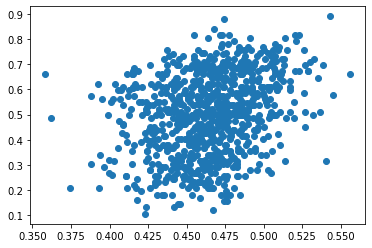

In [12]:
plt.scatter(team_4factor_data["eFG%"],team_4factor_data["Winning Percentage"])

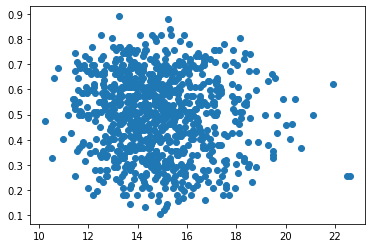

In [13]:
plt.scatter(team_4factor_data["TOV%"],team_4factor_data["Winning Percentage"])

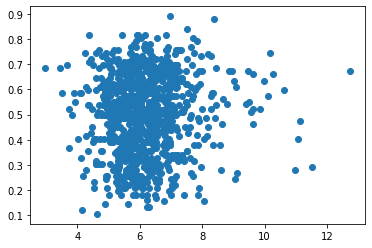

In [14]:
plt.scatter(team_4factor_data["ORB%"],team_4factor_data["Winning Percentage"])

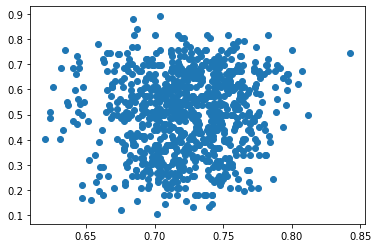

In [15]:
plt.scatter(team_4factor_data["FT%"],team_4factor_data["Winning Percentage"])

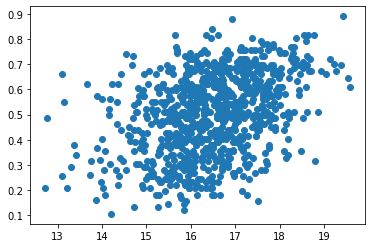

In [16]:
x_axis1 = team_4factor_data["Four Factor Ratings"]
y_axis1 = team_4factor_data["Winning Percentage"]
plt.scatter(x_axis1, y_axis1)

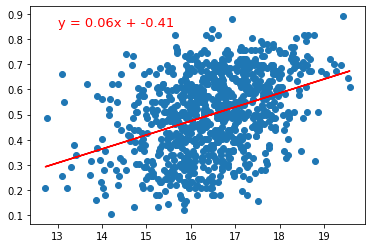

In [17]:
x_axis1 = team_4factor_data["Four Factor Ratings"]
y_axis1 = team_4factor_data["Winning Percentage"]

(slope1, intercept1, r_value1, p_value1, std_err1) = stats.linregress(x_axis1,y_axis1)

regress_value1 = slope1*x_axis1 + intercept1

line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

plt.scatter(x_axis1, y_axis1)
plt.plot(x_axis1,regress_value1, "r-")
plt.annotate(line_eq1,(13,0.85), fontsize=13, color="red")
plt.show()

In [18]:
four_factor_2017season = four_factor_data.loc[(four_factor_data["Year"] > 2016.0)]
four_factor_2017season                                        

,Year,Player,TM,eFG%,TOV%,ORB%,FT%,Winning Percentage,Four Factor Ratings
521,2017,Kent Bazemore,ATL,0.473,13.6,2.6,0.708,0.575,16.14620
522,2017,DeAndre' Bembry,ATL,0.485,13.2,4.2,0.375,0.575,16.99625
523,2017,Jose Calderon,ATL,0.474,19.9,3.2,0.875,0.575,14.75625
524,2017,Malcolm Delaney,ATL,0.407,18.1,1.0,0.806,0.575,12.07590
525,2017,Mike Dunleavy,ATL,0.565,9.0,3.1,0.846,0.575,21.09690
...,...,...,...,...,...,...,...,...,...
15062,2017,Otto Porter,WAS,0.608,4.8,5.1,0.832,0.535,24.26480
15063,2017,Tomas Satoransky,WAS,0.449,19.1,3.9,0.697,0.535,14.06955
15064,2017,Jason Smith,WAS,0.585,14.2,6.8,0.686,0.535,21.31290
15065,2017,Marcus Thornton,WAS,0.467,10.1,4.3,0.852,0.535,17.14280


In [19]:
team_4factor_2017 = four_factor_2017season.groupby("TM").mean()
team_4factor_2017.head()

,Year,eFG%,TOV%,ORB%,FT%,Winning Percentage,Four Factor Ratings
TM,,,,,,,
ATL,2017,0.474300,12.385000,3.915000,0.733100,0.575,16.768715
BOS,2017,0.539667,11.013333,5.513333,0.715533,0.625,20.043330
BRK,2017,0.495762,13.828571,4.428571,0.764571,0.214,17.373733
CHI,2017,0.456833,11.050000,4.400000,0.741706,0.477,17.466256
CHO,2017,0.469579,11.868421,5.342105,0.760833,0.512,17.562181


In [20]:
team_4factor_2017["Predicted Winning Percentage"] = (slope1 * team_4factor_2017["Four Factor Ratings"]) + intercept1
team_4factor_2017["Difference in Winning Percentages"] = (team_4factor_2017["Winning Percentage"] - team_4factor_2017["Predicted Winning Percentage"]) * 100
#team_4factor_2017["Difference in Winning Percentages"] = team_4factor_2017["Difference in Winning Percentages"].map('{:,.2f}%'.format)

In [21]:
winning_percentages_analysis_2017 = team_4factor_2017[["Four Factor Ratings", "Predicted Winning Percentage", "Winning Percentage", "Difference in Winning Percentages"]]
winning_percentages_analysis_2017

,Four Factor Ratings,Predicted Winning Percentage,Winning Percentage,Difference in Winning Percentages
TM,,,,
ATL,16.768715,0.517035,0.575,5.796548
BOS,20.043330,0.698527,0.625,-7.352684
BRK,17.373733,0.550567,0.214,-33.656706
CHI,17.466256,0.555695,0.477,-7.869504
CHO,17.562181,0.561012,0.512,-4.901157
CLE,18.557565,0.616180,0.714,9.782023
DAL,17.036237,0.531862,0.341,-19.086166
DEN,19.586453,0.673205,0.419,-25.420487
DET,16.930847,0.526021,0.467,-5.902050


In [22]:
wp_quartiles = winning_percentages_analysis_2017["Difference in Winning Percentages"].abs().quantile([.25,.5,.75])
lowerq_wp = wp_quartiles[.25]
median_wp = wp_quartiles[.5]
upperq_wp = wp_quartiles[.75]
iqr_wp = upperq_wp -lowerq_wp
lower_bound_wp = lowerq_wp - (1.5*iqr_wp)
upper_bound_wp = upperq_wp + (1.5*iqr_wp)


print(f"Lower Quartile: {lowerq_wp}\n"
      f"Median: {median_wp}\n"
      f"Upper Quartile: {upperq_wp}\n"
      f"IQR: {iqr_wp}\n"
      f"Upper Bound: {upper_bound_wp} & Lower Bound: {lower_bound_wp}\n")

Lower Quartile: 4.901156695608677
Median: 10.504810437864709
Upper Quartile: 22.270079668593556
IQR: 17.36892297298488
Upper Bound: 48.32346412807088 & Lower Bound: -21.152227763868645



#### Question 2 - Markdown

In [23]:
age_player_data =  complete_nba_data[["Year","Player","Age","G","MP","PER"]]
age_player_data

,Year,Player,Age,G,MP,PER
0,1986,John Battle,23.0,64.0,639.0,11.7
1,1986,Antoine Carr,24.0,17.0,258.0,14.4
2,1986,Lorenzo Charles,22.0,36.0,273.0,11.5
3,1986,Johnny Davis,30.0,27.0,402.0,13.9
4,1986,Scott Hastings,25.0,62.0,650.0,7.5
...,...,...,...,...,...,...
15257,1997,Rod Strickland,30.0,82.0,2997.0,19.7
15258,1997,Ben Wallace,22.0,34.0,197.0,6.0
15259,1997,Chris Webber,23.0,72.0,2806.0,21.8
15260,1997,Chris Whitney,25.0,82.0,1117.0,15.2


In [24]:
mp_quartiles = age_player_data["MP"].quantile([.25,.5,.75])
lowerq_mp = mp_quartiles[.25]
median_mp = mp_quartiles[.5]
upperq_mp = mp_quartiles[.75]
iqr_mp = upperq_mp -lowerq_mp
lower_bound_mp = lowerq_mp - (1.5*iqr_mp)
upper_bound_mp = upperq_mp + (1.5*iqr_mp)


print(f"Lower Quartile: {lowerq_mp}\n"
      f"Median: {median_mp}\n"
      f"Upper Quartile: {upperq_mp}\n"
      f"IQR: {iqr_mp}\n"
      f"Upper Bound: {upper_bound_mp} & Lower Bound: {lower_bound_mp}\n")

Lower Quartile: 292.25
Median: 972.0
Upper Quartile: 1891.75
IQR: 1599.5
Upper Bound: 4291.0 & Lower Bound: -2107.0



In [25]:
game_quartiles = age_player_data["G"].quantile([.25,.5,.75])
lowerq_game = game_quartiles[.25]
median_game = game_quartiles[.5]
upperq_game = game_quartiles[.75]
iqr_game = upperq_game -lowerq_game
lower_bound_game = lowerq_game - (1.5*iqr_game)
upper_bound_game = upperq_game + (1.5*iqr_game)


print(f"Lower Quartile: {lowerq_game}\n"
      f"Median: {median_game}\n"
      f"Upper Quartile: {upperq_game}\n"
      f"IQR: {iqr_game}\n"
      f"Upper Bound: {upper_bound_game} & Lower Bound: {lower_bound_game}\n")

Lower Quartile: 24.0
Median: 53.0
Upper Quartile: 75.0
IQR: 51.0
Upper Bound: 151.5 & Lower Bound: -52.5



In [26]:
median_player = age_player_data.groupby("Player").median()
median_player

,Year,Age,G,MP,PER
Player,,,,,
A.C. Green,1994.0,30.0,82.0,2240.0,13.80
A.J. Bramlett,2000.0,23.0,8.0,61.0,-0.40
A.J. English,1991.5,23.5,75.5,1554.0,11.55
A.J. Guyton,2002.0,23.0,33.0,607.0,10.30
A.J. Hammons,2017.0,24.0,22.0,163.0,8.40
...,...,...,...,...,...
Zeljko Rebraca,2004.0,31.0,29.5,450.0,14.00
Zendon Hamilton,2004.0,28.0,11.0,46.0,13.50
Zoran Dragic,2015.0,25.0,8.0,37.5,8.55


In [27]:
top_players = median_player.loc[(median_player["G"]>=24.0) & (median_player["MP"]>=292.25)]
top_players

,Year,Age,G,MP,PER
Player,,,,,
A.C. Green,1994.0,30.0,82.0,2240.0,13.80
A.J. English,1991.5,23.5,75.5,1554.0,11.55
A.J. Guyton,2002.0,23.0,33.0,607.0,10.30
A.J. Price,2013.5,26.5,36.0,380.5,11.10
Aaron Brooks,2013.0,28.0,48.5,867.5,12.50
...,...,...,...,...,...
Zarko Cabarkapa,2005.0,23.0,43.0,484.5,13.20
Zaza Pachulia,2010.5,25.5,72.5,1361.0,14.05
Zeljko Rebraca,2004.0,31.0,29.5,450.0,14.00


In [28]:
x_axis = top_players["Age"]
y_axis = top_players["PER"]

In [29]:
(slope, intercept, r_value, p_value, std_err) = stats.linregress(x_axis,y_axis)

In [30]:
regress_value = slope*x_axis + intercept

In [31]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

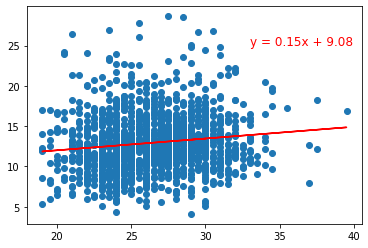

In [32]:
plt.scatter(top_players["Age"],top_players["PER"])
plt.plot(x_axis,regress_value, "r-")
plt.annotate(line_eq,(33,25), fontsize=12, color="red")
plt.show()

#### Question 3 - Markdown

In [33]:
complete_nba_data.head()

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,AST,STL,BLK,TOV,PF,PTS,Team,Record,Winning Percentage,TM
0,7937,1986,John Battle,SG,23.0,ATL,64.0,0.0,639.0,11.7,...,74.0,23.0,3.0,47.0,80.0,277.0,Hawks,50-32,0.61,ATL
1,7963,1986,Antoine Carr,PF,24.0,ATL,17.0,0.0,258.0,14.4,...,14.0,7.0,15.0,14.0,51.0,116.0,Hawks,50-32,0.61,ATL
2,7973,1986,Lorenzo Charles,SF,22.0,ATL,36.0,0.0,273.0,11.5,...,8.0,2.0,6.0,18.0,37.0,122.0,Hawks,50-32,0.61,ATL
3,8000,1986,Johnny Davis,SG,30.0,ATL,27.0,7.0,402.0,13.9,...,112.0,13.0,0.0,38.0,32.0,144.0,Hawks,50-32,0.61,ATL
4,8050,1986,Scott Hastings,PF,25.0,ATL,62.0,0.0,650.0,7.5,...,26.0,14.0,8.0,40.0,118.0,193.0,Hawks,50-32,0.61,ATL


In [34]:
player_points_data = complete_nba_data[["Year", "Player", "TM", "PTS", "Winning Percentage"]]
player_points_data["Player"] = player_points_data["Player"].str.replace("*","", regex=False)
player_points_data = player_points_data.sort_values(["Year"], ignore_index=True)
player_points_data

C:\Users\Jay D\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Player,TM,PTS,Winning Percentage
0,1986,John Battle,ATL,277.0,0.610
1,1986,John Paxson,CHI,395.0,0.366
2,1986,Mike Smrek,CHI,108.0,0.366
3,1986,Orlando Woolridge,CHI,1448.0,0.366
4,1986,Kiki Vandeweghe,POR,1962.0,0.488
...,...,...,...,...,...
15257,2017,Shelvin Mack,UTA,430.0,0.644
15258,2017,Raul Neto,UTA,100.0,0.644
15259,2017,Jeff Withey,UTA,146.0,0.644
15260,2017,Derrick Favors,UTA,476.0,0.644


In [35]:
sort_players_pts_data = player_points_data.sort_values(["PTS"], ascending = False, ignore_index=True)
sort_players_pts_data

,Year,Player,TM,PTS,Winning Percentage
0,1987,Michael Jordan,CHI,3041.0,0.488
1,1988,Michael Jordan,CHI,2868.0,0.610
2,2006,Kobe Bryant,LAL,2832.0,0.549
3,1990,Michael Jordan,CHI,2753.0,0.671
4,1989,Michael Jordan,CHI,2633.0,0.573
...,...,...,...,...,...
15257,1999,Brian Shaw,POR,0.0,0.700
15258,1995,Derrick Phelps,SAC,0.0,0.476
15259,2003,Guy Rucker,GSW,0.0,0.463
15260,1995,Greg Kite,NYK,0.0,0.671


In [36]:
top_10_players_pts = sort_players_pts_data.drop_duplicates(subset=["Player"], keep='first').head(10)
top_10_players_pts

,Year,Player,TM,PTS,Winning Percentage
0,1987,Michael Jordan,CHI,3041.0,0.488
2,2006,Kobe Bryant,LAL,2832.0,0.549
5,2014,Kevin Durant,OKC,2593.0,0.720
7,2017,Russell Westbrook,OKC,2558.0,0.568
9,1990,Karl Malone,UTA,2540.0,0.671
11,2006,LeBron James,CLE,2478.0,0.610
16,1986,Alex English,DEN,2414.0,0.573
17,2003,Tracy McGrady,ORL,2407.0,0.512
19,1988,Dominique Wilkins,ATL,2397.0,0.610
20,2009,Dwyane Wade,MIA,2386.0,0.524


In [37]:
top_10 = top_10_players_pts["Player"].tolist()
print(f"Top 10 NBA players based on points are {top_10}")
# Write a loop to print top 10 players and give user input

Top 10 NBA players based on points are ['Michael Jordan', 'Kobe Bryant', 'Kevin Durant', 'Russell Westbrook', 'Karl Malone', 'LeBron James', 'Alex English', 'Tracy McGrady', 'Dominique Wilkins', 'Dwyane Wade']


In [82]:
user_input_data = player_points_data.loc[player_points_data["Player"] == 'Tracy McGrady'].reset_index()
user_input_data = user_input_data[["Year", "Player", "TM", "Winning Percentage"]]
user_input_data

,Year,Player,TM,Winning Percentage
0,1998,Tracy McGrady,TOR,0.195
1,1999,Tracy McGrady,TOR,0.460
2,2000,Tracy McGrady,TOR,0.549
3,2001,Tracy McGrady,ORL,0.524
4,2002,Tracy McGrady,ORL,0.537
5,2003,Tracy McGrady,ORL,0.512
6,2004,Tracy McGrady,ORL,0.256
7,2005,Tracy McGrady,HOU,0.622
8,2006,Tracy McGrady,HOU,0.415
9,2007,Tracy McGrady,HOU,0.634


In [83]:
new_team = []
year = []
winning_percentage = []
team_change = pd.Series([], dtype = 'float64')
change = 0

old_team = user_input_data.iloc[0,2]

for row,values in user_input_data.iterrows():
    if values[2] != old_team:
        new_team.append(values[2])
        year.append(values[0])
        winning_percentage.append(values[3])
        #team_change = pd.concat([team_change,values])
        old_team = values[2]
        change =+ 1
    
if change == 0:
    print(f"Player didnot change his team")

print(new_team)
print(year)
print(winning_percentage)

['ORL', 'HOU', 'NYK', 'HOU', 'DET', 'ATL']
[2001, 2005, 2010, 2010, 2011, 2012]
[0.524, 0.622, 0.354, 0.512, 0.366, 0.606]
